In [ ]:
!pip install tensorflow-datasets
!pip install tensorflow-addons

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from src.algonauts.data_processors.image_transforms import transform_alexnet
from src.algonauts.models.alexnet import create_alexnet_softmax

## Train AlexNet Tensorflow Implementation on CIFAR-100

Here we train our own AlexNet implementation on the CIFAR-100 dataset, which is a dataset for classification of 100 categories

In [ ]:
# Load COCO 2017 dataset with annotations
dataset, info = tfds.load('cifar100', with_info=True, data_dir='../data/tensorflow_datasets')

In [3]:
print(info)

tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='../data/tensorflow_datasets/cifar100/3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),
 

In [28]:
# Get and preprocess training and validation datasets
def preprocess_cifar100(ds, batch_size):
    return ds.shuffle(10000)\
        .map(lambda x: (transform_alexnet(x['image']), tf.one_hot(x['label'], depth=num_classes)))\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

batch_size = 32
train_ds = preprocess_cifar100(dataset['train'], batch_size)
val_ds = preprocess_cifar100(dataset['test'], batch_size)

In [ ]:
for d in train_ds.take(1):
    print(d)

In [30]:
num_classes = 100  # number of classes in cifar-100
# Create AlexNet model
model = create_alexnet_softmax(num_classes)

In [31]:
# Compile the model
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

## Train, save and plot loss/accuracy on the training and validation set

Epoch 1/10


2023-03-29 00:59:28.752758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.9316 - accuracy: 0.0320

2023-03-29 01:06:56.978524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 475s 299ms/step - loss: 4.9316 - accuracy: 0.0320 - val_loss: 4.1890 - val_accuracy: 0.0513
Epoch 2/10
1563/1563 [==============================] - 449s 286ms/step - loss: 4.1568 - accuracy: 0.0591 - val_loss: 4.0996 - val_accuracy: 0.0765
Epoch 3/10
1563/1563 [==============================] - 453s 289ms/step - loss: 3.9535 - accuracy: 0.0827 - val_loss: 3.9320 - val_accuracy: 0.0976
Epoch 4/10
1563/1563 [==============================] - 447s 284ms/step - loss: 3.7163 - accuracy: 0.1151 - val_loss: 3.6038 - val_accuracy: 0.1602
Epoch 5/10
1563/1563 [==============================] - 416s 265ms/step - loss: 3.4720 - accuracy: 0.1543 - val_loss: 3.3701 - val_accuracy: 0.2036
Epoch 6/10
1563/1563 [==============================] - 249s 159ms/step - loss: 3.1895 - accuracy: 0.2046 - val_loss: 3.0722 - val_accuracy: 0.2520
Epoch 7/10
1563/1563 [==============================] - 250s 160ms/step - loss: 2.8811 - accuracy: 0.2595 - val_loss: 2.730

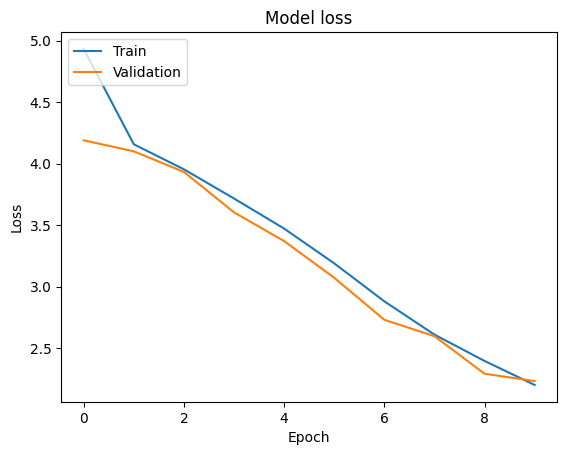

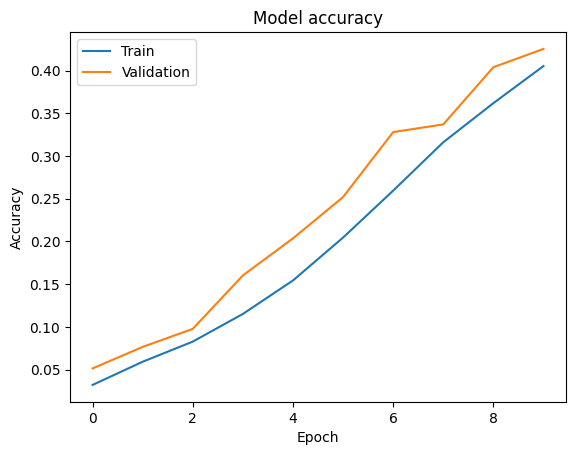

In [32]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
model.save('alexnet_cifar.h5')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 11/25
1563/1563 [==============================] - 257s 162ms/step - loss: 2.0307 - accuracy: 0.4459 - val_loss: 2.1715 - val_accuracy: 0.4382
Epoch 12/25
1563/1563 [==============================] - 241s 154ms/step - loss: 1.8716 - accuracy: 0.4825 - val_loss: 2.2092 - val_accuracy: 0.4436
Epoch 13/25
1563/1563 [==============================] - 290s 185ms/step - loss: 1.7345 - accuracy: 0.5161 - val_loss: 1.9531 - val_accuracy: 0.4879
Epoch 14/25
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5998 - accuracy: 0.5478 - val_loss: 2.0089 - val_accuracy: 0.4791
Epoch 15/25
1563/1563 [==============================] - 251s 160ms/step - loss: 1.4902 - accuracy: 0.5758 - val_loss: 2.0074 - val_accuracy: 0.4918
Epoch 16/25
1563/1563 [==============================] - 244s 156ms/step - loss: 1.3698 - accuracy: 0.6058 - val_loss: 1.9804 - val_accuracy: 0.4934
Epoch 17/25
1563/1563 [==============================] - 246s 157ms/step - loss: 1.2798 - accuracy: 0.6299

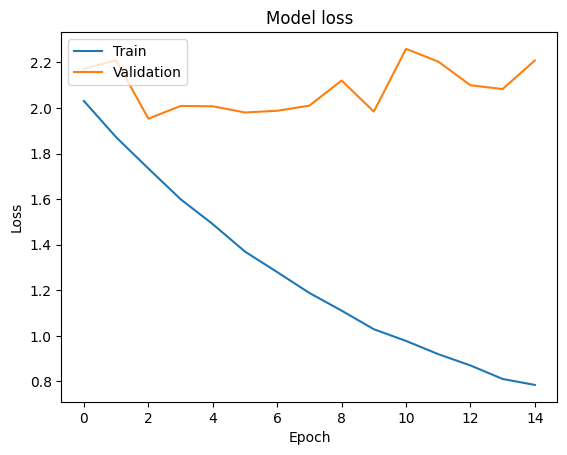

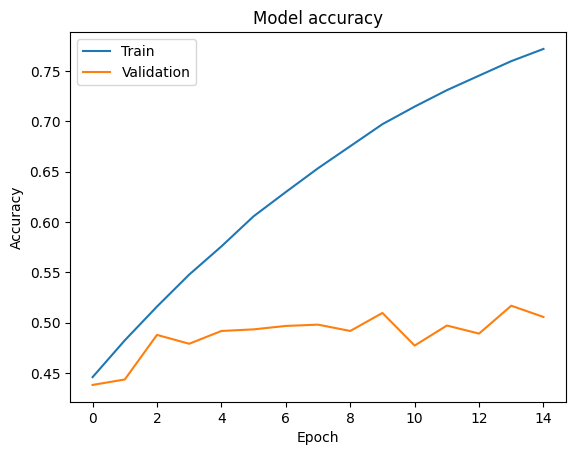

In [33]:
history = model.fit(train_ds, initial_epoch=10, epochs=25, validation_data=val_ds)
model.save('alexnet_cifar2.h5')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=1,
)
history = model.fit(train_ds, initial_epoch=25, epochs=50, validation_data=val_ds)
model.save('alexnet_cifar2.h5')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()